<a href="https://colab.research.google.com/github/SangeethaManammal/DeepLearningSamples/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

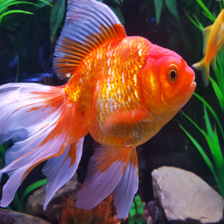

In [5]:
gold_fish = Image.open("/content/drive/My Drive/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
predicted_index = np.argmax(result)
predicted_index

2

In [10]:
ImageNetLabels = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
ImageNetLabels

'/root/.keras/datasets/ImageNetLabels.txt'

In [11]:
with open("/root/.keras/datasets/ImageNetLabels.txt","r") as f:
    image_label = f.read().splitlines()
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_label[predicted_index]

'goldfish'

In [13]:
## The images are already downloaded in Data Augmentation.ipynb 

#data_dir = '.\\datasets\\flower_photos'
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=data_url,cache_dir=".",untar=True)

In [14]:
import pathlib
data_dir  = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [16]:
flower_dict = {
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "roses": list(data_dir.glob("roses/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*"))    
}

In [17]:
flower_dict_labels = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4    
}

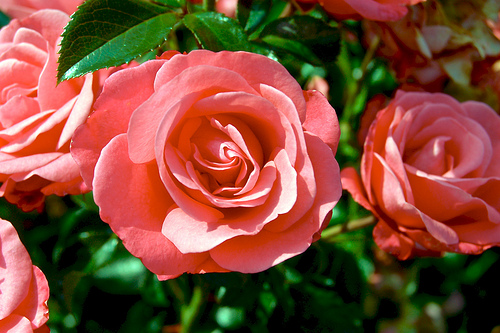

In [18]:
PIL.Image.open(str(flower_dict['roses'][3]))

In [19]:
img = cv2.imread(str(flower_dict['roses'][3]))
img.shape

(333, 500, 3)

In [20]:
x,y = [],[]

for flower_name,images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flower_dict_labels[flower_name])

In [21]:
x = np.array(x)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [23]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

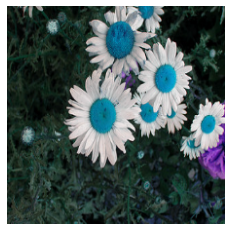

In [24]:
plt.axis('off')
plt.imshow(x[0])

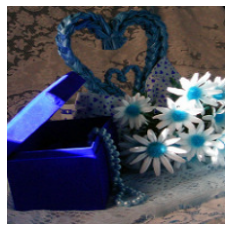

In [25]:
plt.axis('off')
plt.imshow(x[2])

In [26]:
predicted = np.argmax(classifier.predict(np.array([x[0],x[1],x[2]])),axis=1)
image_label[predicted[0]]

'shower curtain'

In [27]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pre_trained_model_w_o_toplayer = hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [28]:
num_of_flowers = 5
model = tf.keras.Sequential([
        pre_trained_model_w_o_toplayer,
        keras.layers.Dense(num_of_flowers)                     
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [30]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 12s 83ms/step - loss: 0.8172 - accuracy: 0.7013
Epoch 2/10
86/86 [==============================] - 7s 82ms/step - loss: 0.4272 - accuracy: 0.8503
Epoch 3/10
86/86 [==============================] - 7s 83ms/step - loss: 0.3278 - accuracy: 0.8921
Epoch 4/10
86/86 [==============================] - 7s 82ms/step - loss: 0.2817 - accuracy: 0.9073
Epoch 5/10
86/86 [==============================] - 7s 83ms/step - loss: 0.2352 - accuracy: 0.9328
Epoch 6/10
86/86 [==============================] - 7s 82ms/step - loss: 0.2107 - accuracy: 0.9426
Epoch 7/10
86/86 [==============================] - 7s 82ms/step - loss: 0.1834 - accuracy: 0.9502
Epoch 8/10
86/86 [==============================] - 7s 82ms/step - loss: 0.1632 - accuracy: 0.9622
Epoch 9/10
86/86 [==============================] - 7s 82ms/step - loss: 0.1488 - accuracy: 0.9633
Epoch 10/10
86/86 [==============================] - 7s 81ms/step - loss: 0.1344 - accuracy: 0.9702
